In [67]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle_zillow
from functions import remove_outliers, remove_columns

from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

# Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
df = data('iris')

In [11]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [12]:
print(df.head(3).to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|
|  1 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  2 |            4.9 |           3   |            1.4 |           0.2 | setosa    |
|  3 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |


### Not using 'sepal_length', 'petal_length'

In [42]:
X = df[['sepal_width', 'petal_width']]

In [16]:
scaler = MinMaxScaler().fit(X)

In [17]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [19]:
print(X_scaled.head().to_markdown())

|    |   sepal_width |   petal_width |
|---:|--------------:|--------------:|
|  1 |      0.625    |     0.0416667 |
|  2 |      0.416667 |     0.0416667 |
|  3 |      0.5      |     0.0416667 |
|  4 |      0.458333 |     0.0416667 |
|  5 |      0.666667 |     0.0416667 |


In [20]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [26]:
print(df.sample(10).to_markdown())

|     |   sepal_length |   sepal_width |   petal_length |   petal_width | species    |   cluster |
|----:|---------------:|--------------:|---------------:|--------------:|:-----------|----------:|
| 115 |            5.8 |           2.8 |            5.1 |           2.4 | virginica  |         1 |
| 120 |            6   |           2.2 |            5   |           1.5 | virginica  |         2 |
| 135 |            6.1 |           2.6 |            5.6 |           1.4 | virginica  |         2 |
| 123 |            7.7 |           2.8 |            6.7 |           2   | virginica  |         1 |
| 127 |            6.2 |           2.8 |            4.8 |           1.8 | virginica  |         1 |
|  80 |            5.7 |           2.6 |            3.5 |           1   | versicolor |         2 |
| 104 |            6.3 |           2.9 |            5.6 |           1.8 | virginica  |         1 |
|  11 |            5.4 |           3.7 |            1.5 |           0.2 | setosa     |         0 |
|  76 |   

In [27]:
print(X_scaled.sample(10).to_markdown())

|     |   sepal_width |   petal_width |   cluster |
|----:|--------------:|--------------:|----------:|
| 146 |      0.416667 |     0.916667  |         1 |
|  77 |      0.333333 |     0.541667  |         2 |
|  71 |      0.5      |     0.708333  |         1 |
| 131 |      0.333333 |     0.75      |         1 |
| 115 |      0.333333 |     0.958333  |         1 |
| 121 |      0.5      |     0.916667  |         1 |
|  58 |      0.166667 |     0.375     |         2 |
|  42 |      0.125    |     0.0833333 |         2 |
| 116 |      0.5      |     0.916667  |         1 |
|  70 |      0.208333 |     0.416667  |         2 |


In [29]:
df.groupby('cluster')

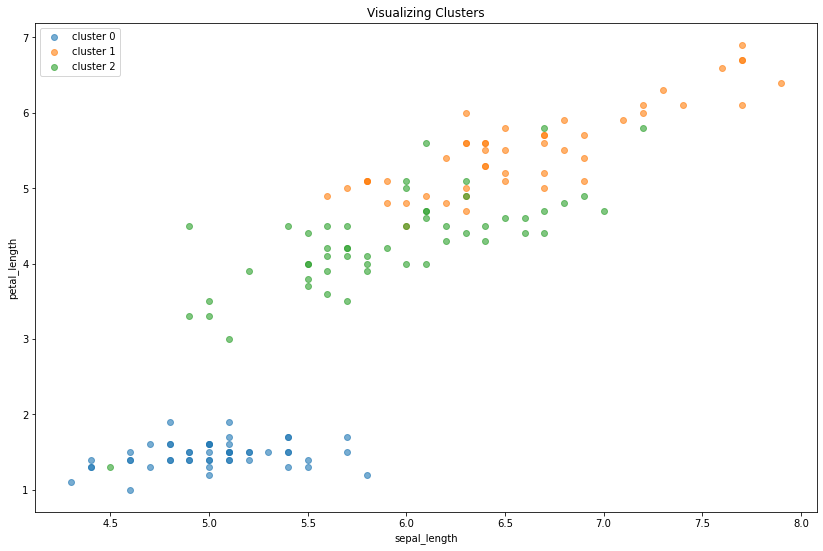

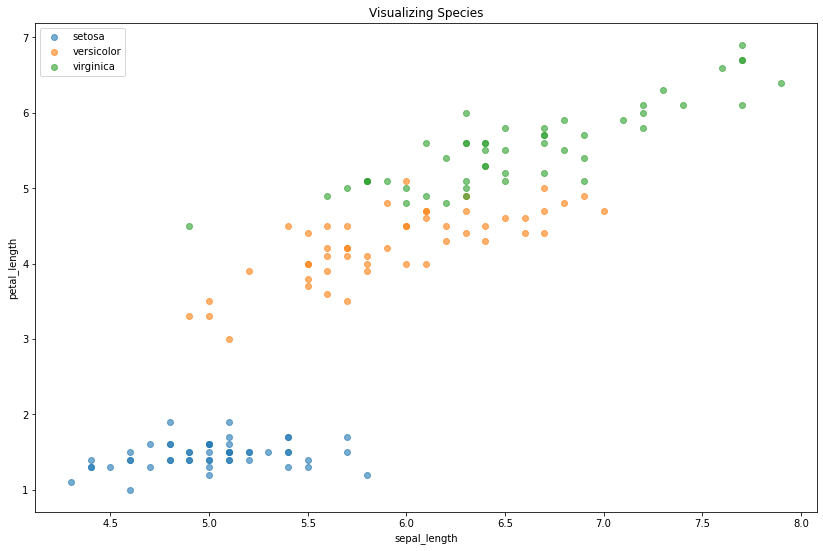

In [30]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in df.groupby('species'):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

In [31]:
kmeans.cluster_centers_

array([[0.60459184, 0.06037415],
       [0.43402778, 0.81336806],
       [0.29481132, 0.50393082]])

In [32]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.604592,0.060374
1,0.434028,0.813368
2,0.294811,0.503931


In [34]:
df.groupby('cluster')['sepal_length', 'petal_length'].mean()

,sepal_length,petal_length
cluster,,
0,5.016327,1.465306
1,6.606250,5.516667
2,5.916981,4.284906


In [38]:
centroids = df.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,5.016327,1.465306
1,6.606250,5.516667
2,5.916981,4.284906


Text(0.5, 1.0, 'Visualizing Cluster Centers')

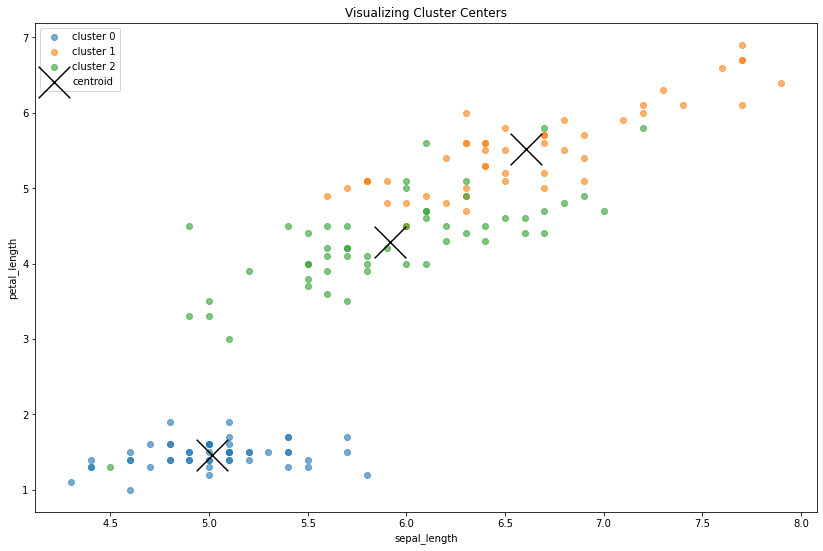

In [39]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

In [40]:
kmeans.inertia_

3.576804853066748

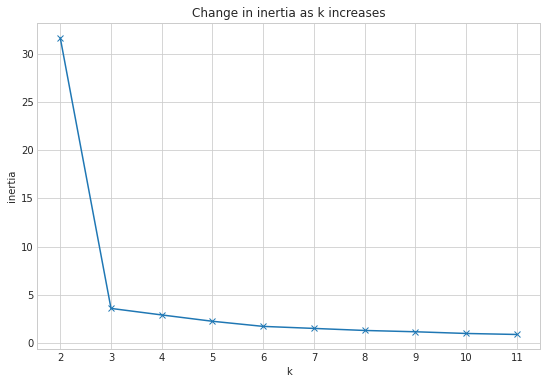

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Repeat the clustering, this time with 3 different features.

In [48]:
X = df[['sepal_width', 'petal_width', 'sepal_width']]

scaler = MinMaxScaler().fit(X)

X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids = df.groupby('cluster')['sepal_length', 'petal_length'].mean()

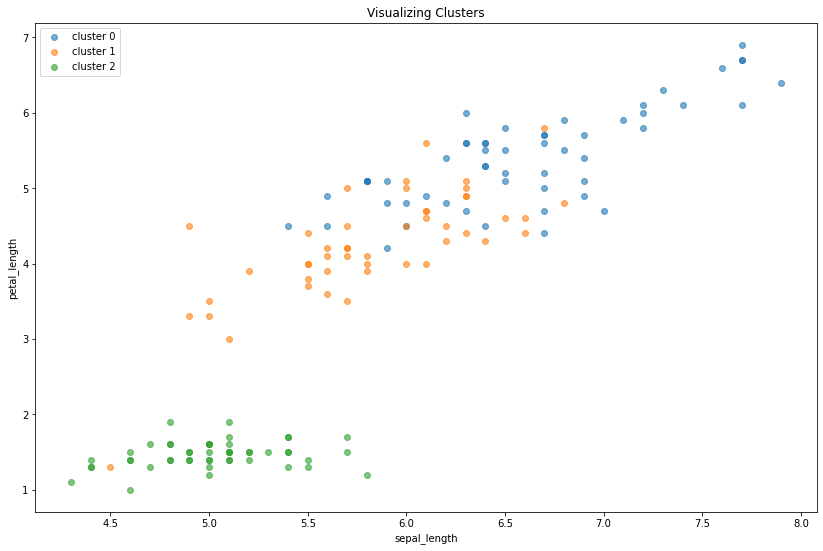

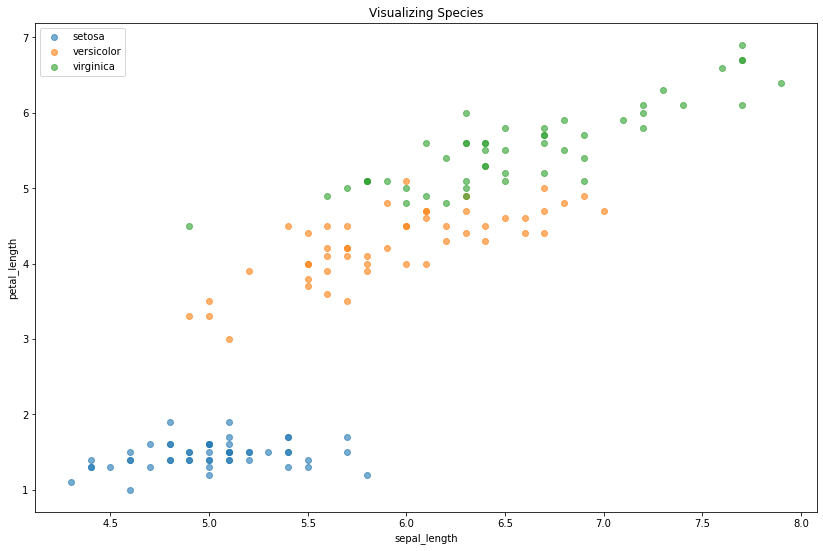

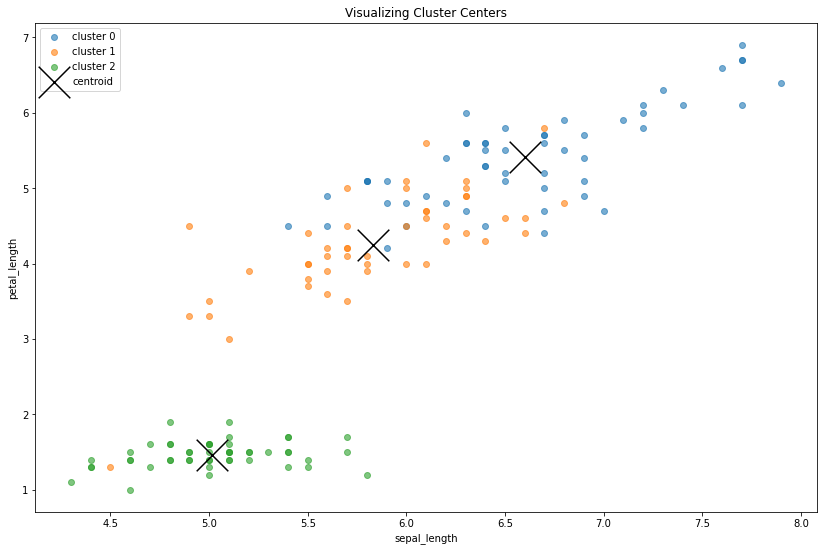

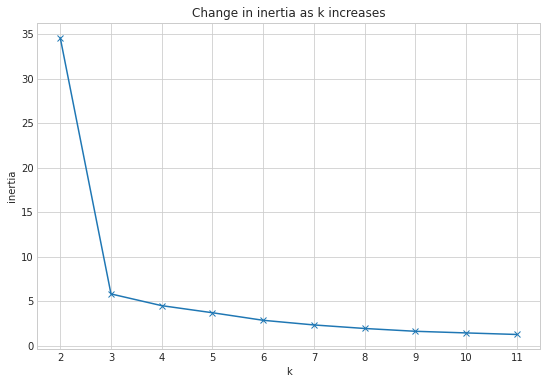

In [51]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in df.groupby('species'):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [66]:
def get_db_url(url):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

In [68]:
sql_query = """
    Select *
    From customers"""

df = pd.read_sql(sql_query, get_db_url('mall_customers'))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
X = df[['age', 'annual_income']]

scaler = MinMaxScaler().fit(X)

X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids = df.groupby('cluster')['age', 'annual_income'].mean()

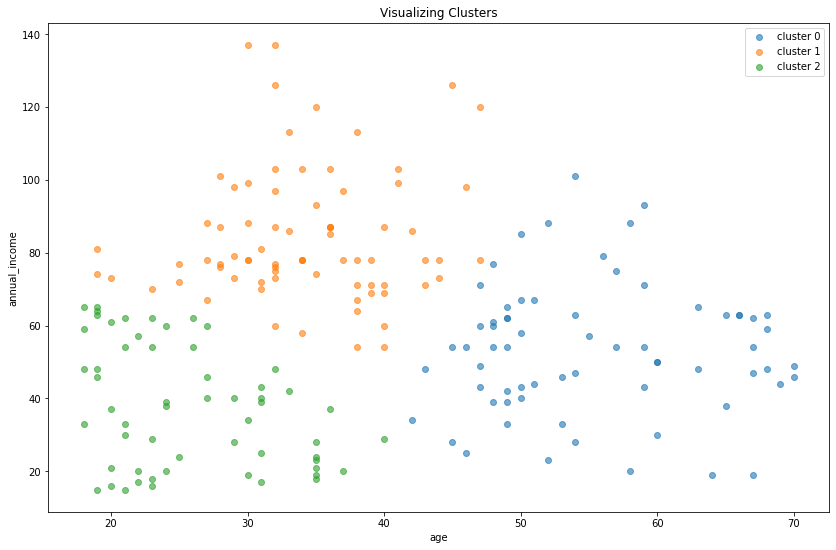

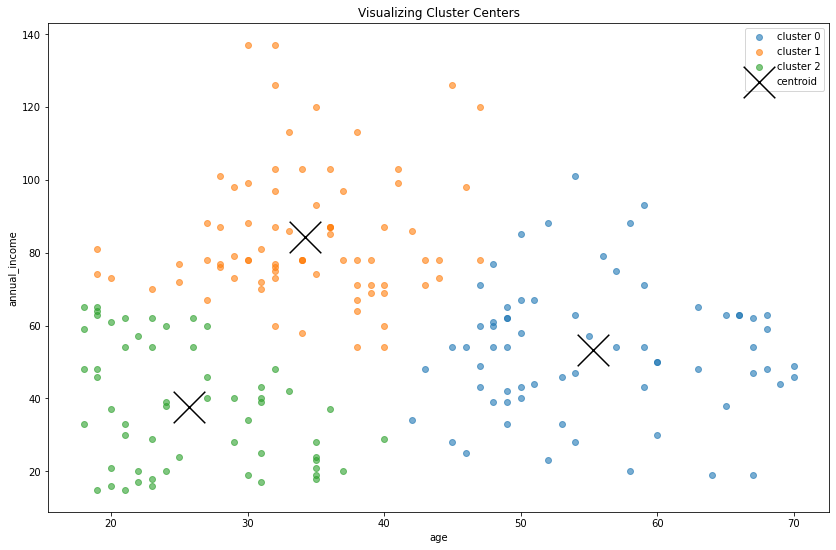

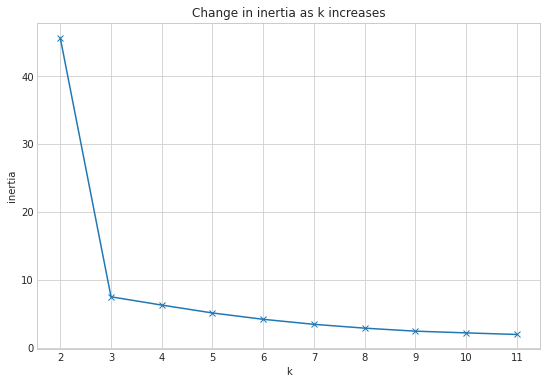

In [74]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [75]:
X = df[['age', 'annual_income', 'spending_score']]

scaler = MinMaxScaler().fit(X)

X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids = df.groupby('cluster')['age', 'annual_income'].mean()

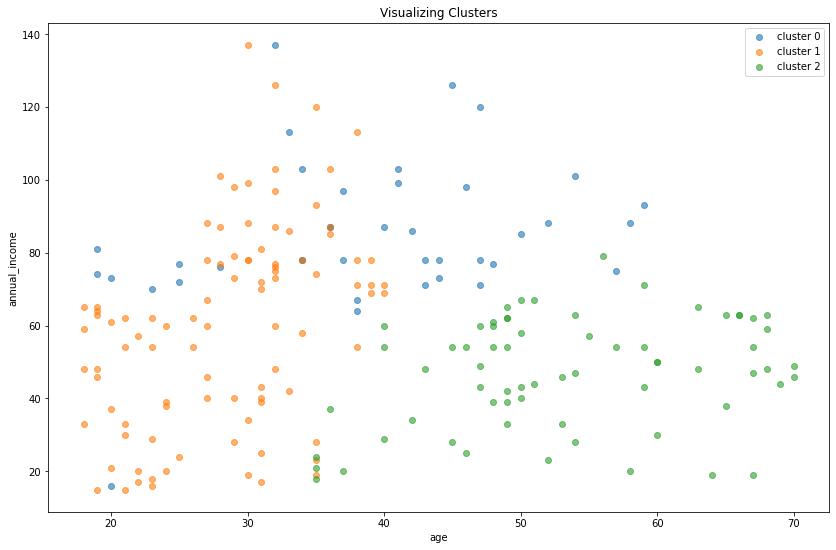

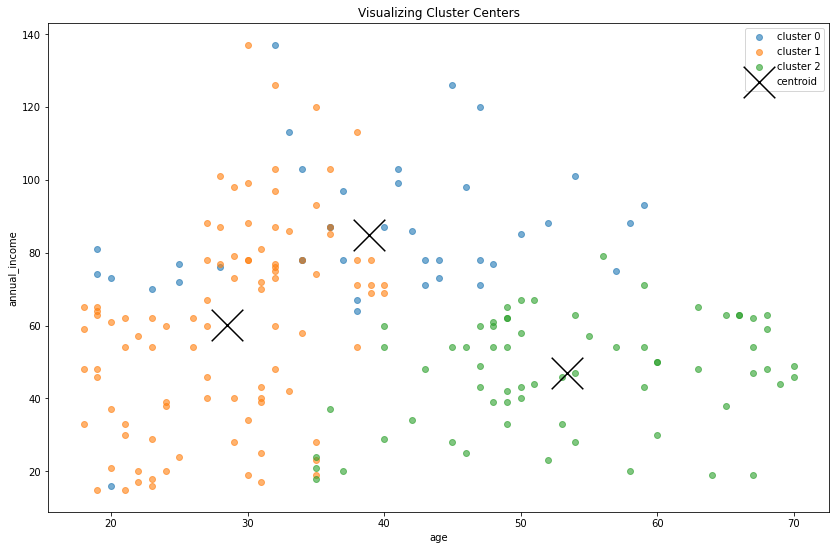

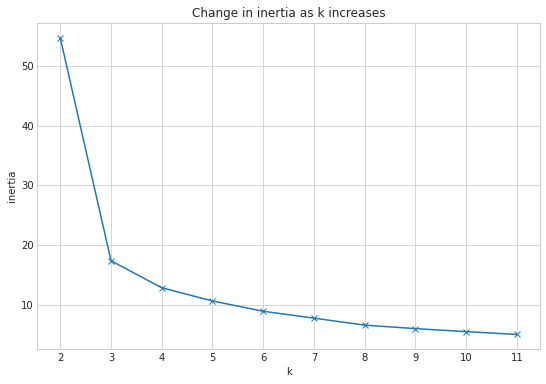

In [76]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# How does scaling impact the results of clustering?

In [79]:
#Scaled example above, I will not be scaling below but it will be called X_scaled so I dont have to retype everything

In [80]:
X_scaled = df[['age', 'annual_income', 'spending_score']]

# scaler = MinMaxScaler().fit(X)

# X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids = df.groupby('cluster')['age', 'annual_income'].mean()

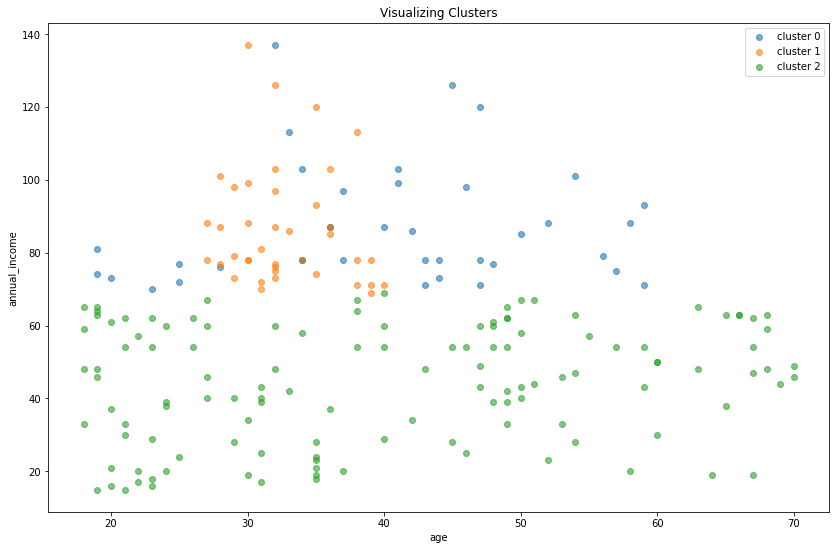

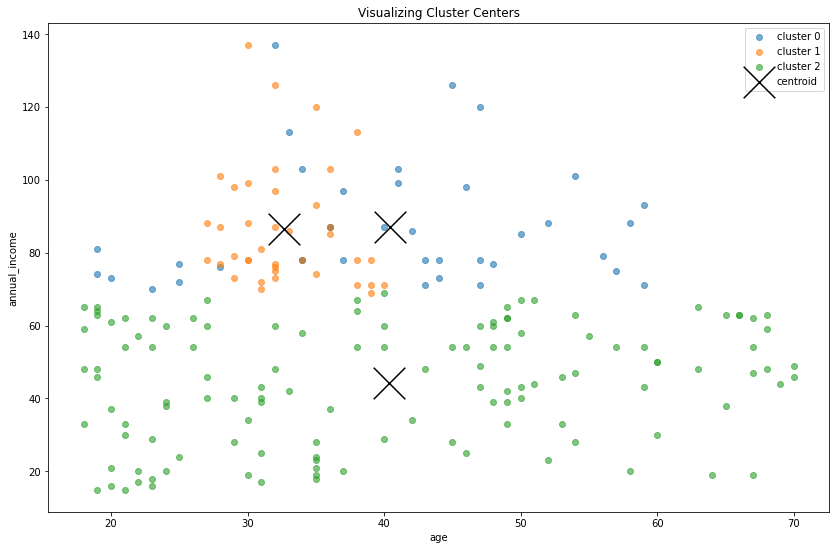

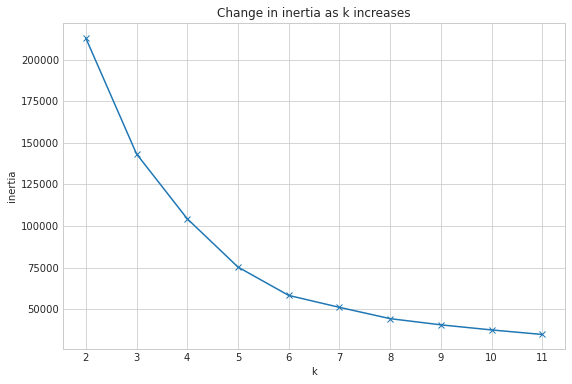

In [81]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Not so clear results not scaled